PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

**Lo primero que hacemos es un analisis exploratorio de los datos de nuestro dataset para analizar de que datos esta compuesto, como se comportan, si tiene datos nulos, cuantos, etc.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
properati_1=pd.read_csv('properati.csv')
properati_1.head(10)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
7,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta


In [3]:
properati_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [4]:
properati_1.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [5]:
properati_1.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [6]:
properati_1.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F07C92AF0>,
      dtype=object)

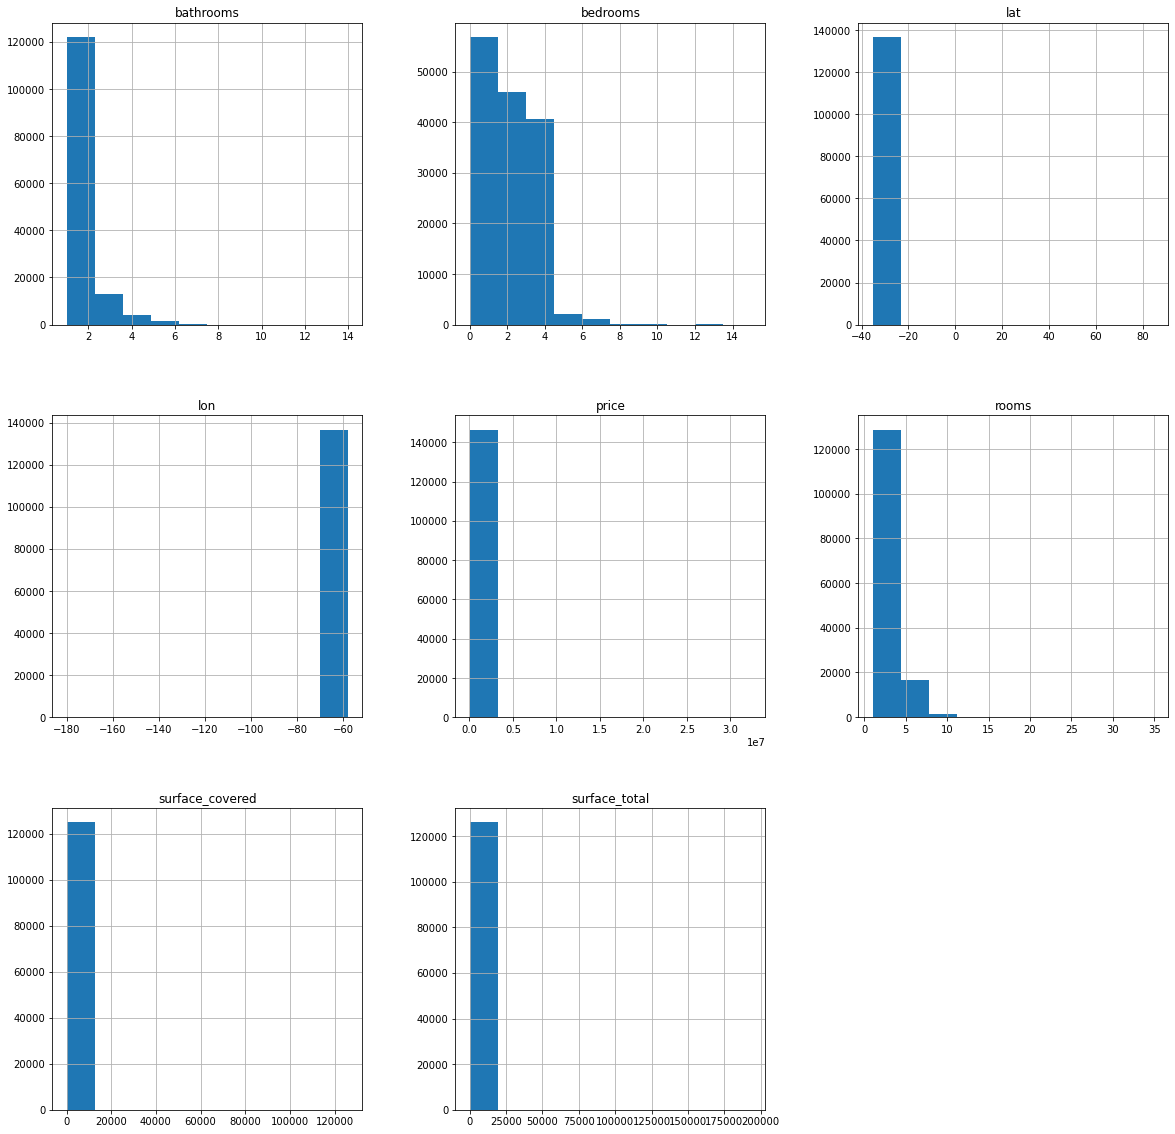

In [7]:
properati_1.hist(figsize = (20,20))

## **TRANFORMACIONES DEL PROYECTO 1**

In [8]:
data_ultimo = properati_1

In [9]:
tipos_propiedad=properati_1.property_type.value_counts().index[:3].to_list()
data_ultimo=data_ultimo[(properati_1.l2=='Capital Federal') & (properati_1.property_type.isin(tipos_propiedad))]
data_ultimo.shape

(91485, 19)

In [10]:
data_ultimo=data_ultimo[(data_ultimo.surface_total <=1000) & (data_ultimo.surface_total>=15) & (data_ultimo.price<=4000000)]

In [11]:
data_ultimo=data_ultimo.iloc[:,8:14]

In [12]:
data_ultimo=data_ultimo.dropna(axis=0)
data_ultimo.reset_index(drop=True,inplace=True)

In [13]:
data_ultimo.shape

(81019, 6)

### **MODELOS**

In [14]:
X_proyecto = data_ultimo.loc[:, ['rooms', 'bedrooms', 'bathrooms','surface_total','surface_covered']]

In [15]:
y_proyecto = data_ultimo.loc[:, ['price']]

In [16]:
from sklearn.model_selection import train_test_split


X_train_proyecto, X_test_proyecto, y_train_proyecto, y_test_proyecto = train_test_split(X_proyecto, y_proyecto, test_size=0.30, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### **ARBOLES**

El r2 sobre el set de entrenamiento: 0.9677981207550042
El r2 sobre el set de evaluacion: 0.7640414126922683
El error absoluto medio sobre el set de entrenamiento: 23729.28230188677
El error absoluto medio sobre el set de evaluacion: 51106.26096635346



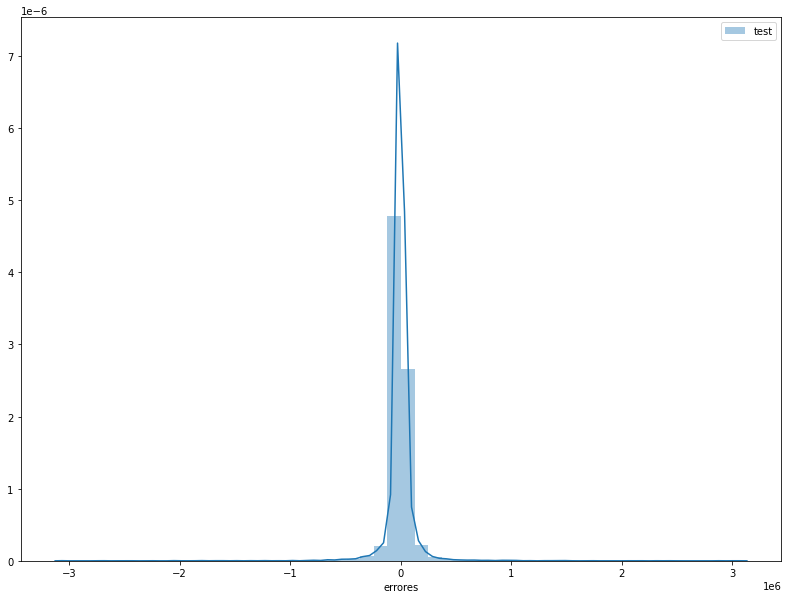

In [18]:
arbol_decision = DecisionTreeRegressor(max_depth=23, random_state=362)
arbol_decision.fit(X_train_proyecto, y_train_proyecto)
y_train_pred_proyecto = arbol_decision.predict(X_train_proyecto)
y_test_pred_proyecto = arbol_decision.predict(X_test_proyecto)


train_maxe = r2_score(y_train_proyecto, y_train_pred_proyecto)
test_maxe = r2_score(y_test_proyecto, y_test_pred_proyecto)
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)


train_mae = mean_absolute_error(y_train_proyecto, y_train_pred_proyecto)
test_mae = mean_absolute_error(y_test_proyecto, y_test_pred_proyecto)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()



plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test_proyecto) -(y_test_pred_proyecto).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

#### **KNN**

In [19]:
vecinos_cercanos = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
vecinos_cercanos.fit(X_train_proyecto, y_train_proyecto)
y_train_pred_proyecto = vecinos_cercanos.predict(X_train_proyecto)
y_test_pred_proyecto = vecinos_cercanos.predict(X_test_proyecto)

El r2 sobre el set de entrenamiento: 0.9664284438106173
El r2 sobre el set de evaluacion: 0.7959557478047647
El error absoluto medio sobre el set de entrenamiento: 24120.73024056801
El error absoluto medio sobre el set de evaluacion: 49889.734567116124



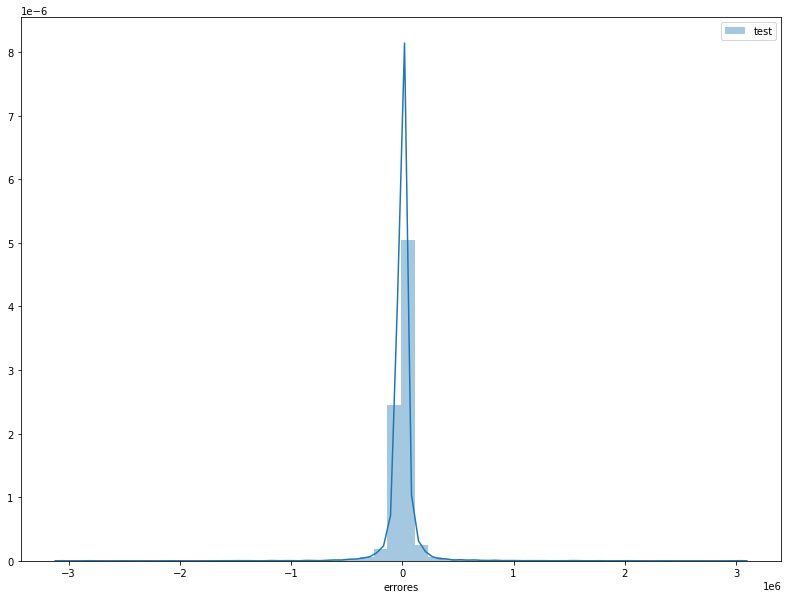

In [20]:
train_maxe = r2_score(y_train_proyecto, y_train_pred_proyecto)
test_maxe = r2_score(y_test_proyecto, y_test_pred_proyecto)
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)


train_mae = mean_absolute_error(y_train_proyecto, y_train_pred_proyecto)
test_mae = mean_absolute_error(y_test_proyecto, y_test_pred_proyecto)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()



plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test_proyecto) -(y_test_pred_proyecto).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

**Lo que estamos mostrando aqui son las transformaciones que fueron propuestas en el proyecto 1. En el modelo de vecinos mas cercanos, el cual se ajusta mejor a nuestro problema, tenemos un r2 de 0,795 y un error absoluto medio de 49889. Tambien podemos apreciar como es la distribucion de los distintos errores. Estas metricas son las que luego, vamos a seguir evaluando en los proximos modelos y prestaremos suma atencion en si las transformaciones de datos que hicimos fueron de ayuda para nuestro problema.**

### **DETECCION Y ELIMINACION DE OUTLIERS**

In [21]:
dataset_sin_dup = properati_1.drop_duplicates()
print(f'Numero de instancias duplicadas', properati_1.shape[0]-dataset_sin_dup.shape[0])
print(f'Numero de instancias del dataset filtrado', dataset_sin_dup.shape[0])

Numero de instancias duplicadas 2358
Numero de instancias del dataset filtrado 144302


In [22]:
properati_copia=dataset_sin_dup
wrong_surface_rows = properati_copia.loc[properati_copia.surface_total < properati_copia.surface_covered]
len(wrong_surface_rows)

1431

In [23]:
properati_copia.loc[wrong_surface_rows.index, 'surface_total'] = wrong_surface_rows.surface_covered
properati_copia.loc[wrong_surface_rows.index, 'surface_covered'] = wrong_surface_rows.surface_total

C:\Users\sarar\miniconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
properati_copy=properati_copia

In [25]:
columnas = properati_copy.columns.tolist()
lista_numerica = []
lista_categorica = []
for x in range(0,len(properati_copy.columns))  :
    if properati_copy[columnas[x]].dtype == 'int64'or properati_copy[columnas[x]].dtype == 'float64':
        lista_numerica.append(columnas[x])
    else:
        lista_categorica.append(columnas[x])

In [26]:
lista_numerica.remove('lat')
lista_numerica.remove('lon')

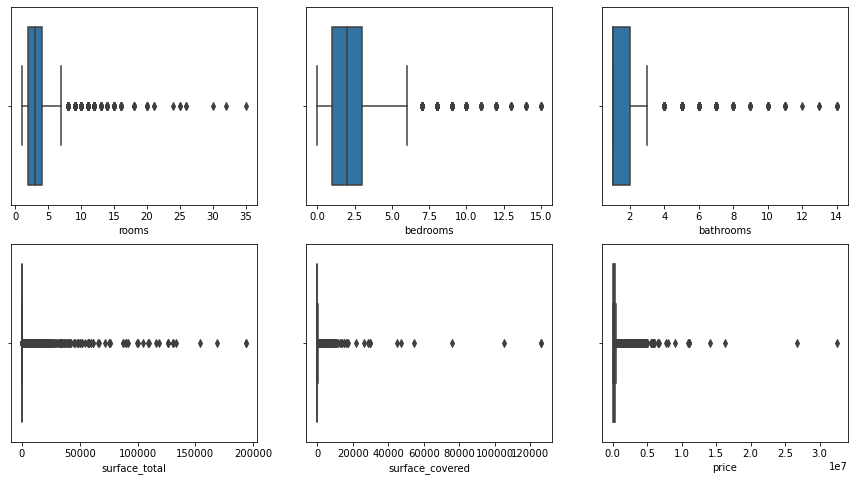

In [27]:
fig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(properati_copy[columns])

In [28]:
def limpiar_dataframe(dataframe, columna):
    q25 = dataframe[columna].quantile(0.25)
    q75 = dataframe[columna].quantile(0.75)
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [29]:
for i in lista_numerica:
    properati_copy=limpiar_dataframe(properati_copy,i)

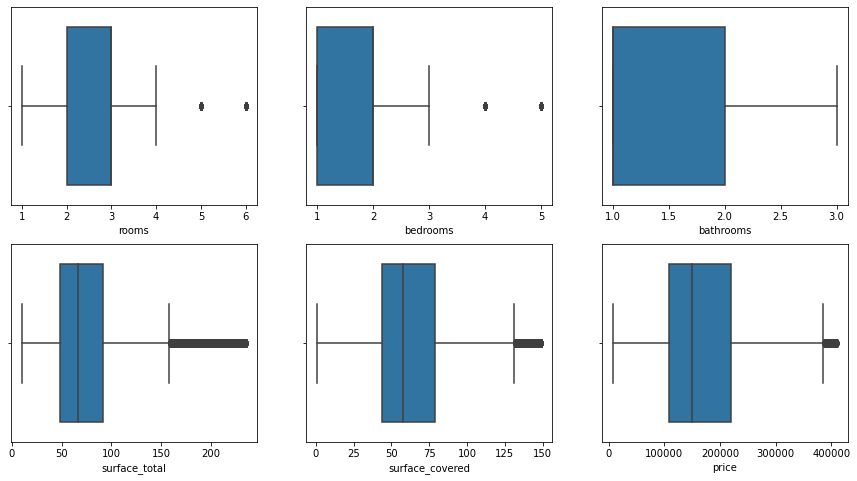

In [30]:
fig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(properati_copy[columns])

In [31]:
properati_copy.reset_index(drop=True,inplace=True)
properati_copy.shape

(93497, 19)

Hacemos una limpieza de los outliers ya que vemos la distribucion de los datos en un boxplot y la visualizacion de los datos es muy pobre. Cuando hacemos la limpieza la visualizacion del boxplot queda mucho mas limpia y clara. Tambien se eliminarion las filas repetidas y las filas donde la superficie cubierta era mayor que la total.

### **IMPUTACION DE VALORES FALTANTES**

In [32]:
def valores_faltantes(df):
    total = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
    porcentaje = round(porcentaje, 2)
    valores_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje %'])
    return valores_faltantes
valores_faltantes(properati_copia)

,Total,Porcentaje %
surface_covered,21339,14.79
surface_total,20261,14.04
lon,9606,6.66
lat,9572,6.63
bathrooms,5924,4.11
operation_type,0,0.00
l3,0,0.00
end_date,0,0.00
created_on,0,0.00
l1,0,0.00


In [33]:
properati_copia.lon.fillna(0,inplace=True)
properati_copia.lat.fillna(0,inplace=True)

C:\Users\sarar\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
properati_copia.reset_index(drop=True,inplace=True)

**La latitud y la longitud no son relevantes para nuestro estudio por eso las rellenamos con 0.**

In [35]:
valores_faltantes(properati_copia)

,Total,Porcentaje %
surface_covered,21339,14.79
surface_total,20261,14.04
bathrooms,5924,4.11
operation_type,0,0.00
l3,0,0.00
end_date,0,0.00
created_on,0,0.00
lat,0,0.00
lon,0,0.00
l1,0,0.00


In [36]:
nulos=properati_copia[['surface_covered','surface_total','bathrooms']].copy()

In [37]:
nulos.corr()

,surface_covered,surface_total,bathrooms
surface_covered,1.000000,0.507162,0.075422
surface_total,0.507162,1.000000,0.063363
bathrooms,0.075422,0.063363,1.000000


In [38]:
properati_copia.bathrooms.fillna(round(properati_copy.bathrooms.mode()),inplace=True)
properati_copia.surface_total.fillna(properati_copy.surface_total.mode(),inplace=True)
properati_copia.surface_covered.fillna(properati_copy.surface_covered.mode(),inplace=True)

C:\Users\sarar\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [39]:
properati_copia.reset_index(drop=True,inplace=True)

In [40]:
properati_copia.shape

(144302, 19)

**Llenamos los valores faltantes con la moda. Aprovechamos que los valores faltantes no son muchos y los llenamos. Vemos que mejora la precision del modelo si no nos deshacemos de las filas que tienen valores nulos por eso vale la pena hacerlo.**

### **OUTLIERS**

In [41]:
for i in lista_numerica:
    properati_copia=limpiar_dataframe(properati_copia,i)

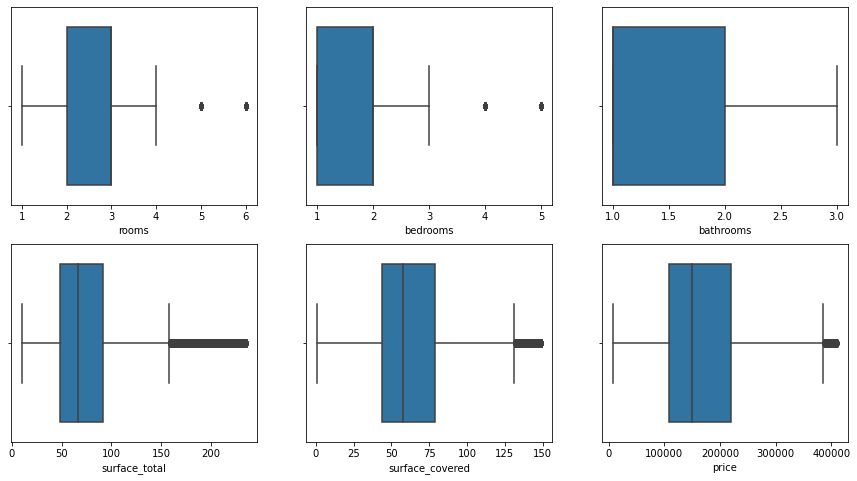

In [42]:
fig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(properati_copia[columns])

In [43]:
properati_copia.reset_index(drop=True,inplace=True)
properati_copia.shape

(93497, 19)

**Luego de ver que la cantidad de instancias coincide con la primer limpieza de outliers que hicimos, podemos concluir que no hacia falta imputar los valores faltantes, solo con la limpieza de outliers era suficiente.**

### **ENCODING**

In [44]:
df=properati_copia.copy()

In [45]:
columns= ['l2', 'l3','property_type']
for x in columns: 
    tipos=df[x]
    tipos_coded= pd.get_dummies(tipos, columns=[x])
    df = df.join(tipos_coded)

In [46]:
df.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,Casa,Casa de campo,Cochera,Departamento,Depósito,Local comercial,Lote,Oficina,Otro,PH
0,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df=df.drop(columns,axis=1)

**Encodeamos l3 y property type para poder utilizarlas en nuestros modelos.**

### **MODELOS**

In [48]:
modelos= df.copy()

In [49]:
modelos=modelos.drop(['start_date','end_date','created_on','lat','lon','l1','currency','title','description','operation_type'],axis=1)

In [50]:
X= modelos.loc[:,:].drop('price',axis=1)
X.shape

(93497, 108)

In [51]:
y=modelos.loc[:,['price']]
y.shape

(93497, 1)

In [52]:
cor=modelos.corr()
cor_lista = abs(cor["price"])
importantes = cor_lista[cor_lista>0.1]
importantes.sort_values(ascending= False)

price                       1.000000
surface_covered             0.638529
bathrooms                   0.573449
surface_total               0.524363
rooms                       0.493984
bedrooms                    0.491923
Bs.As. G.B.A. Zona Sur      0.201708
Bs.As. G.B.A. Zona Oeste    0.201587
Capital Federal             0.172758
Palermo                     0.166855
Recoleta                    0.152441
Belgrano                    0.139488
La Plata                    0.124653
Tres de Febrero             0.121635
Tigre                       0.119902
Puerto Madero               0.103741
Name: price, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### **ESCALADO**

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

**El escalado de datos lo realizamos no para el arbol de decision sino para los otros modelos en los que es util realizar esta accion. Se realiza luego de la division x_train y x_test.**

#### **REDUCCION DE DIMENSIONALIDAD**

In [56]:
from sklearn.decomposition import TruncatedSVD

In [57]:
for i in range(1,10,1):
    SVD=TruncatedSVD(n_components=i,random_state=42,n_iter=5)
    SVD.fit(X)
    print(str(i),str(SVD.explained_variance_ratio_.sum()))

1 0.9268100183076288
2 0.9986597780044617
3 0.9990242572125354
4 0.9992035364343963
5 0.9993445866509726
6 0.9994219277954345
7 0.9994759286381469
8 0.9995189563960714
9 0.9995580951342294


In [58]:
svd=TruncatedSVD(n_components=10,random_state=42,n_iter=7)

In [59]:
X_trun_train=svd.fit_transform(X_train)
X_trun_test=svd.transform(X_test)

In [60]:
from sklearn.decomposition import PCA

In [61]:
for i in range(1,10,1):
        pca = PCA(n_components=i)
        pca.fit(X)
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.936009305312882
2 0.9988428898028664
3 0.9991103421812056
4 0.9992553848527719
5 0.9993714644739831
6 0.9994473745082283
7 0.9995012533727639
8 0.9995440138871736
9 0.9995812314654443


In [62]:
pca = PCA(n_components=4)
X_pca_train=pca.fit_transform(X_train)
X_train=X_pca_train
X_pca_test=pca.transform(X_test)
X_test=X_pca_test

In [63]:
columnas1=['rooms','bedrooms','bathrooms','surface_total','surface_covered']
columnas2=properati_1['l2'].unique().tolist()
columnas3=properati_1['property_type'].unique().tolist()
columnas4=properati_1['l3'].unique().tolist()

In [64]:
for i in range(1,4,1):
        pca = PCA(n_components=i)
        pca.fit(X[columnas2])
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.642866436409008
2 0.8621502377601358
3 1.0000000000001856


In [65]:
for i in range(1,10,1):
        pca = PCA(n_components=i)
        pca.fit(X[columnas3])
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.794044322211337
2 0.9848434495364886
3 0.9972096248669177
4 0.9991660222330527
5 0.9996202147769554
6 0.9998334131531138
7 0.9999185428389764
8 0.9999629781513687
9 1.0000000000000002


In [66]:
for i in range(1,10,1):
        pca = PCA(n_components=i)
        pca.fit(X[columnas4])
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.09798617186669101
2 0.16773848808976477
3 0.23288976985470344
4 0.29041763392914927
5 0.3411862836055213
6 0.38498550216111577
7 0.42216718301771833
8 0.45105634067115963
9 0.47798127829575165


Tratamos de reducir las features de los barrios, zonas y tipos de propiedad, pero el puntaje nos da muy bajo asi que combiene truncar el dataset entero.

In [67]:
pca = PCA(n_components=3)
X_pca_train=pca.fit_transform(X_train)
X_train=X_pca_train
X_pca_test=pca.transform(X_test)
X_test=X_pca_test

**Realizamos la reduccion de dimensionalidad para reducir el costo computacional por lo que es de suma utilidad urilizar este metodo. Pasamos de trabajar con 108 columnas a trabajar con 3. Esto se utiliza para correr la optimizacion de parametros porque la realidad es que no mejora nuestros modelos si no que los empeora**

### **ARBOL DE DECISION PROYECTO 1**

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate

In [69]:
arbol_decision = DecisionTreeRegressor(max_depth=23, random_state=42)
arbol_decision.fit(X_train, y_train.values.ravel())

DecisionTreeRegressor(max_depth=23, random_state=42)

In [70]:
scores_1 = cross_validate(arbol_decision, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.9663954051991602
El r2 sobre el set de evaluacion: 0.7157379258739852

El error absoluto medio sobre el set de entrenamiento: 6931.458046033865
El error absoluto medio sobre el set de evaluacion: 24637.410783609965



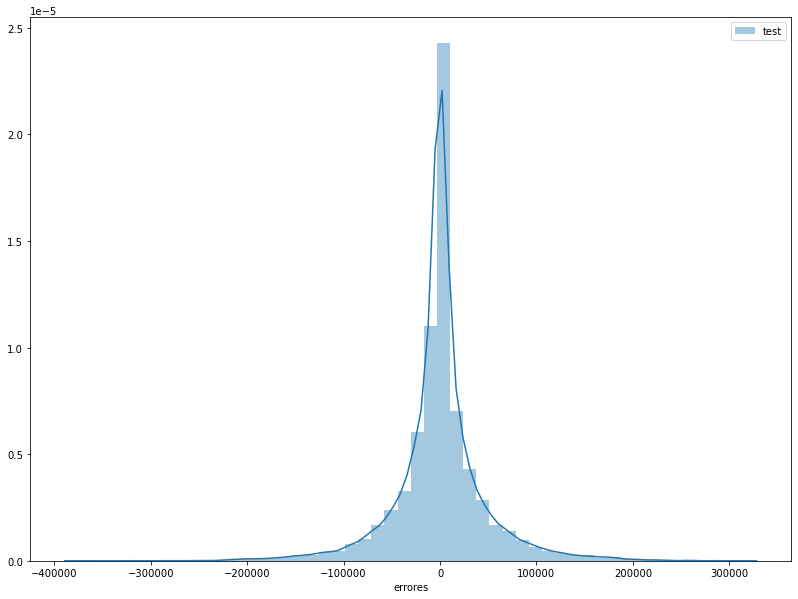

In [71]:
train_maxe = np.mean(scores_1['train_r2'])
test_maxe = np.mean(scores_1['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores_1['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_1['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()


y_train_pred_1 = arbol_decision.predict(X_train)
y_test_pred_1 = arbol_decision.predict(X_test)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test) -(y_test_pred_1).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

### **VECINOS MAS CERCANOS PROYECTO 1**

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn_regressor = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
knn_regressor.fit(X_train, y_train.values.ravel())

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

In [74]:
scores_2 = cross_validate(knn_regressor, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.9727182609725211
El r2 sobre el set de evaluacion: 0.8033397194232702

El error absoluto medio sobre el set de entrenamiento: 5715.667153988863
El error absoluto medio sobre el set de evaluacion: 21037.771168290423



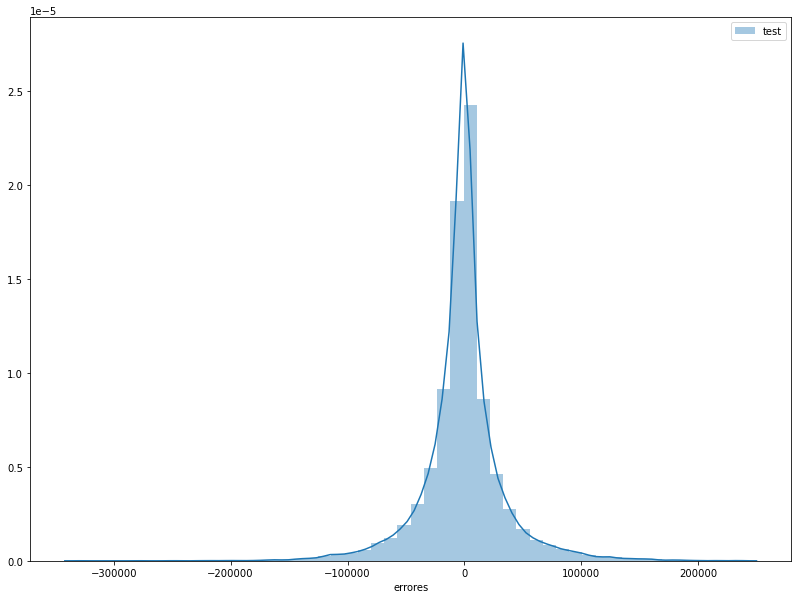

In [75]:
train_maxe = np.mean(scores_2['train_r2'])
test_maxe = np.mean(scores_2['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores_2['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_2['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()


y_train_pred_2 = knn_regressor.predict(X_train)
y_test_pred_2 = knn_regressor.predict(X_test)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot((y_test) -(y_test_pred_2).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

## **PARTE B**

**RANDOM FOREST**

In [76]:
from sklearn.ensemble import RandomForestRegressor


In [77]:
clf = RandomForestRegressor(warm_start=True)
clf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(warm_start=True)

In [78]:
scores_3 = cross_validate(clf, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.9530555437372193
El r2 sobre el set de evaluacion: 0.8102683115833498

El error absoluto medio sobre el set de entrenamiento: 11060.261353923477
El error absoluto medio sobre el set de evaluacion: 21976.35505135834



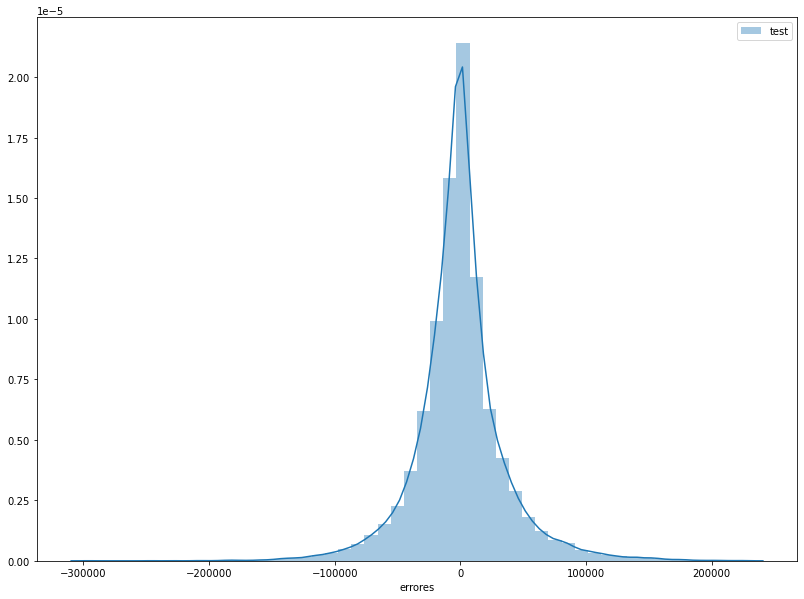

In [79]:
train_maxe = np.mean(scores_3['train_r2'])
test_maxe = np.mean(scores_3['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores_3['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_3['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()


y_train_pred_3 = clf.predict(X_train)
y_test_pred_3 = clf.predict(X_test)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot((y_test) -(y_test_pred_3).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

**XGBOOST**

In [80]:
import xgboost as xgb 

In [81]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
scores_4 = cross_validate(xgb, X_train, y_train, scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.777678086454052
El r2 sobre el set de evaluacion: 0.7300517057174218

El error absoluto medio sobre el set de entrenamiento: 27540.120400633277
El error absoluto medio sobre el set de evaluacion: 30095.632571354316



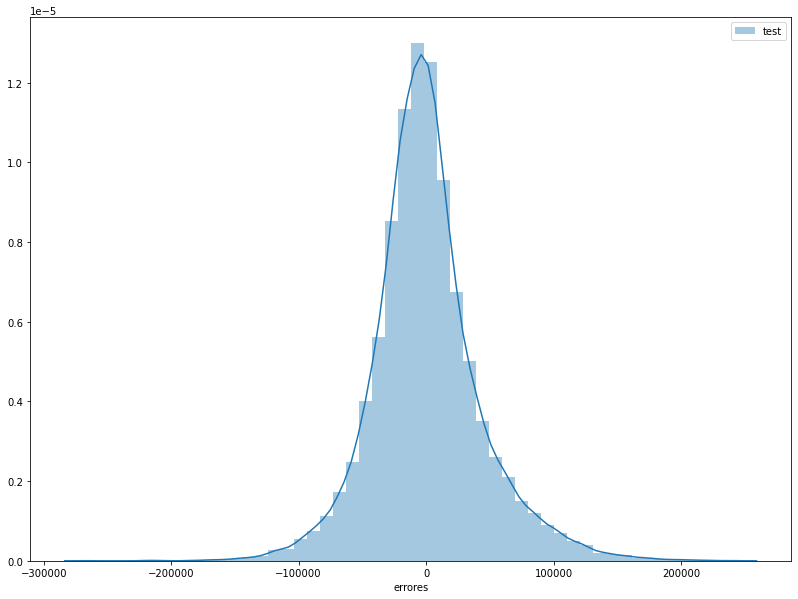

In [83]:
train_maxe = np.mean(scores_4['train_r2'])
test_maxe = np.mean(scores_4['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores_4['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_4['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()


y_train_pred_4 = xgb.predict(X_train)
y_test_pred_4 = xgb.predict(X_test)


plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot((y_test) -(y_test_pred_4).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

**OPTIMIZACION**

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**RANDOM FOREST**

In [85]:
parametros= { 'n_estimators':[500,700,1000],'min_samples_leaf':[1,2,3,4],'max_features': ['log2','auto'],'criterion':['mse'],
            'min_samples_split':[2,5,6] }

In [86]:
model = RandomizedSearchCV(clf,parametros, random_state=0, cv=5,n_jobs=-1)
model.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(warm_start=True),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_features': ['log2', 'auto'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 6],
                                        'n_estimators': [500, 700, 1000]},
                   random_state=0)

In [87]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)

Mejores parametros: {'n_estimators': 700, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'mse'}
Mejor Score: 0.8098371185268833



In [88]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,130.572603,1.538521,23.229785,0.348090,1000,6,3,log2,mse,"{'n_estimators': 1000, 'min_samples_split': 6,...",0.799347,0.803757,0.802053,0.795714,0.793218,0.798818,0.003902,5
1,62.635097,3.479147,2.555433,0.263141,500,2,4,log2,mse,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.792693,0.796936,0.794652,0.788371,0.786559,0.791842,0.003861,9
2,159.293548,4.026227,4.177931,0.537331,500,5,2,auto,mse,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.807872,0.811339,0.811139,0.804947,0.798614,0.806782,0.004712,2
3,102.194175,5.561637,5.871174,1.643016,700,5,3,log2,mse,"{'n_estimators': 700, 'min_samples_split': 5, ...",0.799438,0.803586,0.802240,0.795376,0.793193,0.798767,0.003957,6
4,76.434891,1.857599,2.619012,0.221680,500,5,4,log2,mse,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.792574,0.796652,0.794655,0.788062,0.786736,0.791736,0.003792,10
5,169.385797,5.010032,6.956197,4.265741,500,6,2,auto,mse,"{'n_estimators': 500, 'min_samples_split': 6, ...",0.806722,0.810231,0.809920,0.803637,0.797344,0.805571,0.004762,3
6,115.033376,1.801604,12.961399,3.842963,700,6,1,log2,mse,"{'n_estimators': 700, 'min_samples_split': 6, ...",0.810102,0.815200,0.813402,0.807088,0.803393,0.809837,0.004257,1
7,316.642466,2.292469,13.271739,1.795259,1000,5,3,auto,mse,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.803496,0.807010,0.806423,0.800687,0.794655,0.802454,0.004507,4
8,92.387067,4.232749,3.515874,0.201218,700,6,4,log2,mse,"{'n_estimators': 700, 'min_samples_split': 6, ...",0.792711,0.796840,0.794650,0.788560,0.786564,0.791865,0.003801,8
9,247.691535,17.129628,3.231628,0.845750,1000,6,4,auto,mse,"{'n_estimators': 1000, 'min_samples_split': 6,...",0.798505,0.802041,0.801160,0.795561,0.790153,0.797484,0.004307,7


In [89]:
scores.mean_fit_time.sum()/60

24.537842590808868

El r2 sobre el set de entrenamiento: 0.9321829142092719
El r2 sobre el set de evaluacion: 0.8046583769626605

El error absoluto medio sobre el set de entrenamiento: 13733.246259784617
El error absoluto medio sobre el set de evaluacion: 24172.680672745053



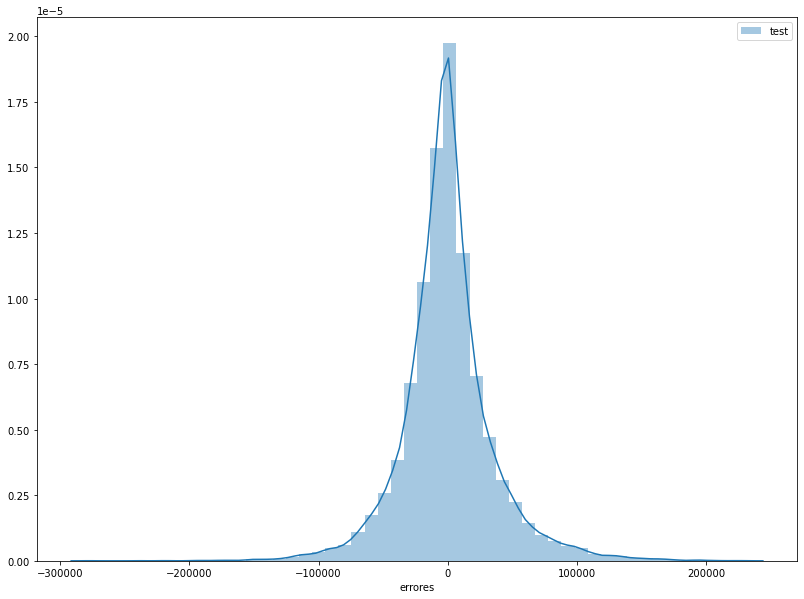

In [90]:
y_train_pred_rfr = model.predict(X_train)
y_test_pred_rfr = model.predict(X_test)

train_maxe = r2_score(y_train, y_train_pred_rfr)
test_maxe = r2_score(y_test, y_test_pred_rfr)

print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = mean_absolute_error(y_train, y_train_pred_rfr)
test_mae = mean_absolute_error(y_test, y_test_pred_rfr)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test) -(y_test_pred_rfr).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

**Max depth no lo tocamos ya que con el default siempre nos daba un mejor modelo. En el numero de estimadores se podrian haber usado valores mas altos pero debido al costo computacional nos quedamos con ese rango. Los parametros restantes se dejaron los valores por default ya que eran los que mejor daban. Con respecto a criterion y max features tambien se realizaron optimizaciones pero se dejaron las mejores.**

**XGBOOST**

In [91]:
parametros = {
    'gamma':[0,0.1,0.3],         #0.3      
    'learning_rate':[0.1,0.07,0.3],
    'max_depth':[8,10],              #10
    'n_estimators':[800,1000],     #1000
    'alpha':[1e-5, 1e-2,  0.75],  #1e-5
    'subsample':[0.6,0.95,1] }          #0.95   

In [92]:
modelo = RandomizedSearchCV(xgb,parametros, random_state=0, cv=5,n_jobs=-1)
modelo.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [93]:
print("Mejores parametros: "+str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

scores = pd.DataFrame(modelo.cv_results_)

Mejores parametros: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'alpha': 0.01}
Mejor Score: 0.8035750819297937



In [94]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,77.859781,0.617703,4.518688,0.596432,0.95,800,10,0.1,0.3,0.75,"{'subsample': 0.95, 'n_estimators': 800, 'max_...",0.804014,0.804034,0.805251,0.799006,0.794192,0.801299,0.004153,2
1,78.709513,4.486137,2.486411,0.531254,1,1000,8,0.3,0.1,1e-05,"{'subsample': 1, 'n_estimators': 1000, 'max_de...",0.796143,0.799042,0.796688,0.791344,0.789942,0.794632,0.003428,6
2,86.330933,0.561823,4.552269,0.638579,0.6,1000,8,0.07,0,1e-05,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.790977,0.791274,0.791902,0.786408,0.783680,0.788848,0.003238,8
3,111.724722,1.055388,5.800257,0.696071,0.95,1000,10,0.07,0.1,0.75,"{'subsample': 0.95, 'n_estimators': 1000, 'max...",0.802630,0.802713,0.804869,0.798138,0.793172,0.800304,0.004186,3
4,84.384179,1.110271,2.352988,0.178913,1,800,10,0.3,0,0.01,"{'subsample': 1, 'n_estimators': 800, 'max_dep...",0.798011,0.801235,0.800692,0.793229,0.787873,0.796208,0.005039,5
5,107.680657,1.459143,7.819472,0.223092,0.6,1000,10,0.1,0.1,0.01,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.807737,0.804876,0.807996,0.799932,0.797333,0.803575,0.004261,1
6,83.759988,1.614220,2.087459,0.454197,1,1000,8,0.3,0.3,1e-05,"{'subsample': 1, 'n_estimators': 1000, 'max_de...",0.796143,0.799042,0.796688,0.791344,0.789942,0.794632,0.003428,6
7,84.880288,0.666314,3.975354,0.370347,0.6,800,10,0.07,0,0.75,"{'subsample': 0.6, 'n_estimators': 800, 'max_d...",0.800223,0.800862,0.804583,0.795450,0.792946,0.798813,0.004128,4
8,86.978747,0.559493,3.187772,0.479808,0.6,1000,8,0.3,0.1,1e-05,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.787284,0.790678,0.787751,0.778696,0.772094,0.783301,0.006883,10
9,70.893907,14.496913,1.431221,0.358506,0.6,1000,8,0.07,0.1,0.01,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.790977,0.791274,0.791902,0.786408,0.783680,0.788848,0.003238,8


In [95]:
scores.mean_fit_time.sum()/60

14.553378570079804

El r2 sobre el set de entrenamiento: 0.9454828491662548
El r2 sobre el set de evaluacion: 0.7863652409134819

El error absoluto medio sobre el set de entrenamiento: 12687.987658578935
El error absoluto medio sobre el set de evaluacion: 25381.947365056818



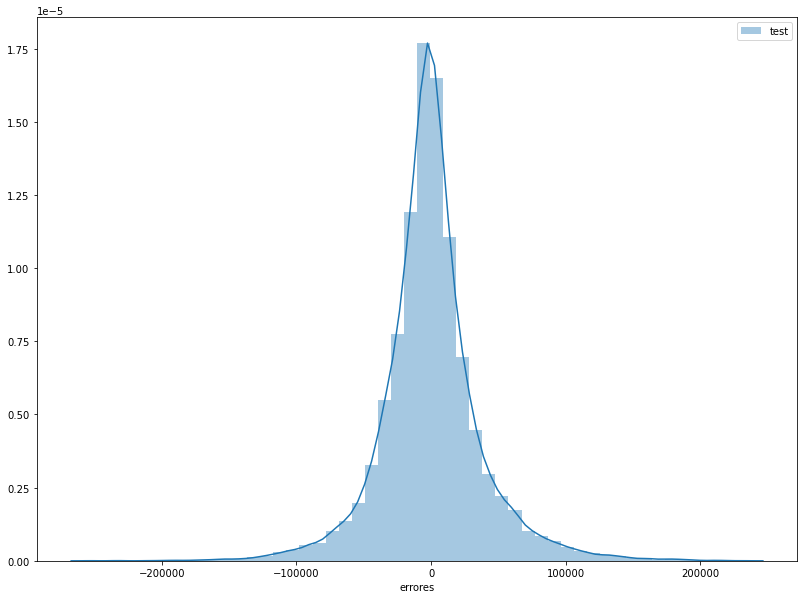

In [96]:
y_train_pred_xgb = modelo.predict(X_train)
y_test_pred_xgb = modelo.predict(X_test)

train_maxe = r2_score(y_train, y_train_pred_xgb)
test_maxe = r2_score(y_test, y_test_pred_xgb)

print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae = mean_absolute_error(y_test, y_test_pred_xgb)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()


plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test) -(y_test_pred_xgb).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

**Lo mismo para n estimators y max depth se podria haber abarcado un mayor rango pero debido al costo computacional se tuvo que reducir. En cuanto a los demas parametros busque en internet informacion sobre que parametros modificar en un caso similar al que estabamos estudiando. Igual realizamos una modificacion de los rangos de cada uno y por medio de muchas iteraciones se fue llegando a esos valores.**

### **MODELOS SIN LA REDUCCION DE DIMENSIONALIDAD**

In [97]:
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
X_train1= scaler.fit_transform(X_train1)
X_test1= scaler.transform(X_test1)

**ARBOL DE DECISION**

In [99]:
arbol_1 = DecisionTreeRegressor(max_depth=23, random_state=42)
arbol_1.fit(X_train1, y_train1.values.ravel())

DecisionTreeRegressor(max_depth=23, random_state=42)

In [100]:
scores_1 = cross_validate(arbol_1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [101]:
train_maxe = np.mean(scores_1['train_r2'])
test_maxe = np.mean(scores_1['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores_1['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores_1['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores_1['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_1['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae,scores_1['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae,scores_1['test_neg_mean_absolute_error'].std()))
print()


y_train_pred1 = arbol_1.predict(X_train1)
y_test_pred1 = arbol_1.predict(X_test1)

El r2 sobre el set de entrenamiento: 0.91066 (+/- 0.00126)
El r2 sobre el set de evaluacion:  0.76489 (+/- 0.00651)

El error absoluto medio sobre el set de entrenamiento: 13968.99907 (+/- 278.57841)
El error absoluto medio sobre el set de evaluacion: 24900.52309 (+/- 278.57841)



**VECINOS MAS CERCANOS**

In [102]:
knn_regressor_1 = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
knn_regressor_1.fit(X_train1, y_train1.values.ravel())

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

In [103]:
scores_2= cross_validate(knn_regressor_1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [104]:
train_maxe = np.mean(scores_2['train_r2'])
test_maxe = np.mean(scores_2['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores_2['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores_2['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores_2['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_2['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae,scores_2['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae,scores_2['test_neg_mean_absolute_error'].std()))
print()

y_train_pred2 = knn_regressor_1.predict(X_train1)
y_test_pred2 = knn_regressor_1.predict(X_test1)

El r2 sobre el set de entrenamiento: 0.97271 (+/- 0.00033)
El r2 sobre el set de evaluacion:  0.83983 (+/- 0.00367)

El error absoluto medio sobre el set de entrenamiento: 5714.90707 (+/- 187.93740)
El error absoluto medio sobre el set de evaluacion: 19148.18286 (+/- 187.93740)



In [105]:
y_train_pred2 = knn_regressor_1.predict(X_train1)
y_test_pred2 = knn_regressor_1.predict(X_test1)

**RANDOM FOREST**

In [106]:
clf_1 = RandomForestRegressor(warm_start=True,n_estimators=170,min_samples_split=2,min_samples_leaf=1,max_features='log2')
clf_1.fit(X_train1, y_train1.values.ravel())

RandomForestRegressor(max_features='log2', n_estimators=170, warm_start=True)

In [107]:
scores_3 = cross_validate(clf_1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [108]:
train_maxe = np.mean(scores_3['train_r2'])
test_maxe = np.mean(scores_3['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores_3['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores_3['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores_3['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_3['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae, scores_3['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae, scores_3['test_neg_mean_absolute_error'].std()))
print()


y_train_pred3 = clf_1.predict(X_train1)
y_test_pred3 = clf_1.predict(X_test1)

El r2 sobre el set de entrenamiento: 0.95884 (+/- 0.00021)
El r2 sobre el set de evaluacion:  0.85064 (+/- 0.00310)

El error absoluto medio sobre el set de entrenamiento: 10199.58863 (+/- 200.47701)
El error absoluto medio sobre el set de evaluacion: 19641.76213 (+/- 200.47701)



**XGBOOST**

In [109]:
import xgboost as xgb 

In [110]:
xgb_1=xgb.XGBRegressor(subsample=0.95,n_estimators=1000,max_depth=10,learning_rate=0.1,gamma=0.3,alpha=0.75)
xgb_1.fit(X_train1, y_train1.values.ravel())

XGBRegressor(alpha=0.75, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.75, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
scores_4 = cross_validate(xgb_1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [112]:
train_maxe = np.mean(scores_4['train_r2'])
test_maxe = np.mean(scores_4['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores_4['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores_4['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores_4['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores_4['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae,scores_4['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae,scores_4['test_neg_mean_absolute_error'].std()))
print()

y_train_pred4 = xgb_1.predict(X_train1)
y_test_pred4 = xgb_1.predict(X_test1)

El r2 sobre el set de entrenamiento: 0.96214 (+/- 0.00029)
El r2 sobre el set de evaluacion:  0.84565 (+/- 0.00300)

El error absoluto medio sobre el set de entrenamiento: 9792.85998 (+/- 146.18737)
El error absoluto medio sobre el set de evaluacion: 19888.73999 (+/- 146.18737)



**Como conclusion si bien en los modelos avanzados tenemos un mejor R2, en el modelo de vecinos mas cercanos tenemos apenas menor error absoluto medio y la distribucion de errores es un poco mejor. En mi opinion elegiria el Random Forest porque con parametros bajos tiene un bajo costo computacional y una muy buena performance, en cambio el modelo de vecinos mas cercanos no se puede optimizar mas y tiene un mayor costo computacional. Igual se podria introducir un mayor rango de parametros en Random Forest y conseguiriamos un mejor modelo, pero el costo computacional era muy grande.**

## **PARTE C**

In [113]:
print('Para Arbol de decision:')
print(arbol_1.feature_importances_)
print()
print('Para Random forest:')
print(clf.feature_importances_)
print()
print('Para XGB:')
print(modelo.best_estimator_.feature_importances_)
print()

Para Arbol de decision:
[1.16653319e-02 1.16982144e-02 8.95295948e-02 1.50306532e-01
 4.45985364e-01 8.89003269e-03 9.48213908e-03 1.17770396e-02
 5.66492889e-02 9.39211311e-05 5.92112234e-05 1.53342660e-03
 1.69026964e-04 4.20944052e-04 1.75116594e-03 7.36285549e-04
 8.92593676e-03 1.76975202e-02 2.86237284e-04 1.17190198e-04
 3.18826133e-04 3.00516601e-03 0.00000000e+00 1.52780193e-05
 2.44643930e-05 4.43342677e-04 6.65418125e-04 2.20618263e-03
 2.58882099e-04 7.36268572e-04 6.17039592e-04 2.74761931e-04
 2.29166185e-04 7.94187967e-05 6.64686689e-04 5.09124849e-04
 1.29472273e-04 2.15802485e-03 1.27017613e-04 1.99455136e-04
 4.04369907e-04 6.72611991e-04 9.73522561e-04 4.34319139e-04
 2.27795562e-03 1.57182450e-04 6.14415922e-04 2.20725253e-04
 3.52020952e-08 6.09402855e-04 2.49132197e-04 1.26311391e-04
 9.17925797e-05 5.09866243e-04 3.51867557e-04 6.50197687e-03
 6.76690902e-04 3.06225797e-02 6.35570207e-05 4.44444360e-04
 3.91878038e-04 3.32873260e-04 3.76454587e-05 6.40941976e-04


**Lo conveniente es entrenar los modelos sin reducir la dimensionalidad para poder seguir trabajando con las features originales y ver cuales fueron relevantes para el modelo.**

In [114]:
feature=arbol_1.feature_importances_
features=pd.DataFrame(data=feature)
columnass=X.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head(15)

,Importancia
surface_covered,0.445985
surface_total,0.150307
bathrooms,0.089530
Capital Federal,0.056649
Departamento,0.035133
Palermo,0.030623
Belgrano,0.017698
Recoleta,0.016626
Bs.As. G.B.A. Zona Sur,0.011777
bedrooms,0.011698


In [115]:
feature=clf_1.feature_importances_
features=pd.DataFrame(data=feature)
columnass=X.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head(15)

,Importancia
surface_covered,0.238935
surface_total,0.238579
bathrooms,0.112608
rooms,0.067432
bedrooms,0.053773
Palermo,0.025447
Capital Federal,0.019317
Bs.As. G.B.A. Zona Sur,0.018003
Bs.As. G.B.A. Zona Oeste,0.016540
Recoleta,0.015952


In [116]:
feature=xgb_1.feature_importances_
features=pd.DataFrame(data=feature)
columnass=X.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head(15)

,Importancia
Capital Federal,0.147161
Puerto Madero,0.109711
Bs.As. G.B.A. Zona Sur,0.046800
Bs.As. G.B.A. Zona Oeste,0.037620
Palermo,0.037351
Villa Lugano,0.031101
Belgrano,0.027333
Las Cañitas,0.026944
Recoleta,0.025441
Nuñez,0.023690


**Como vemos dependiendo del modelo, es la importancia de las features. Para los arboles de decision, bathrooms, surface total y surface covered son por lejos las mas importantes. En cambio para XGBoost le da mas importancia a los barrios y las zonas.**

## **DISTRIBUCION DE ERRORES**

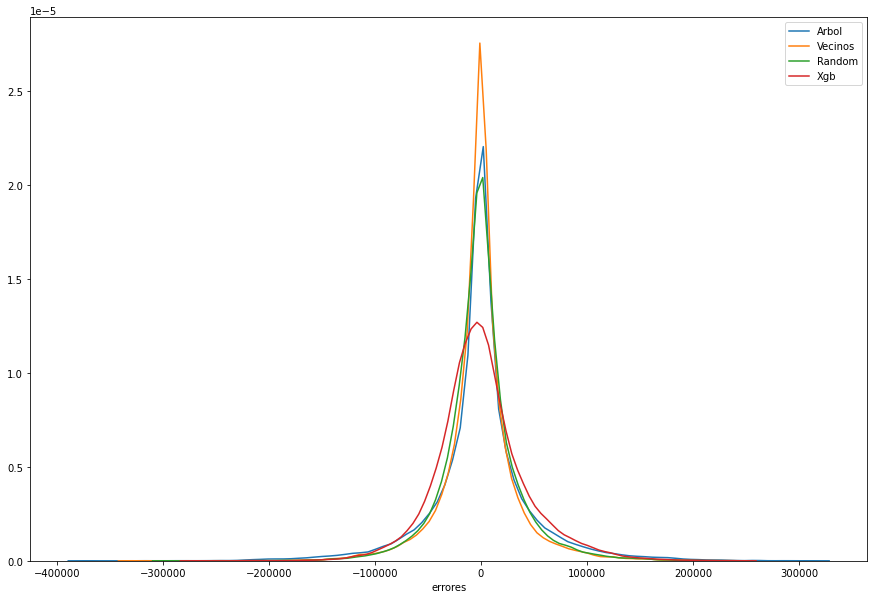

In [117]:
plt.figure(figsize = (15,10))
sns.distplot((y_test) -(y_test_pred_1).reshape(-1,1), bins = 50, label = 'Arbol',hist=False)
sns.distplot((y_test) -(y_test_pred_2).reshape(-1,1), bins = 50, label = 'Vecinos',hist=False)
sns.distplot((y_test) -(y_test_pred_3).reshape(-1,1), bins = 50, label = 'Random',hist=False)
sns.distplot((y_test) -(y_test_pred_4).reshape(-1,1), bins = 50, label = 'Xgb',hist=False)
plt.xlabel('errores')
plt.legend()

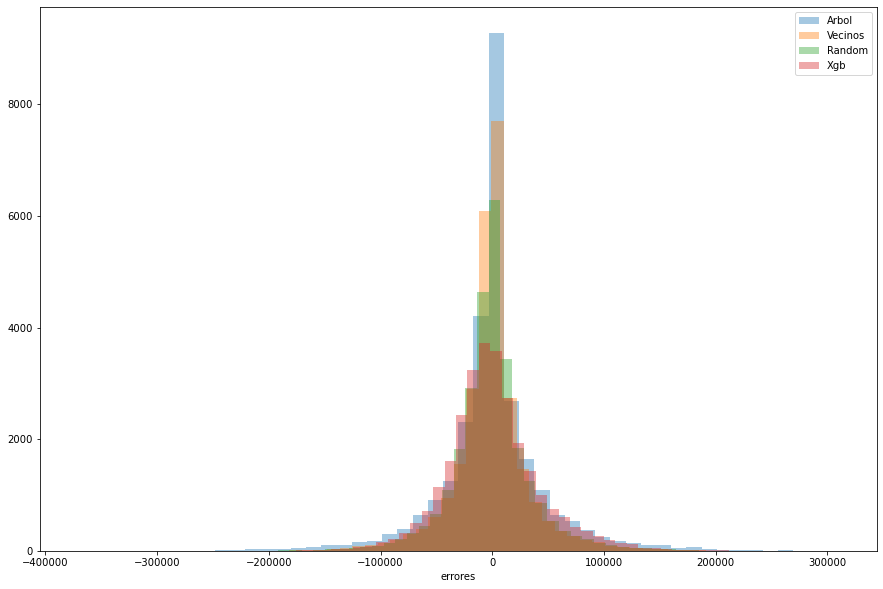

In [118]:
plt.figure(figsize = (15,10))
sns.distplot((y_test) -(y_test_pred_1).reshape(-1,1), bins = 50, label = 'Arbol',kde=False)
sns.distplot((y_test) -(y_test_pred_2).reshape(-1,1), bins = 50, label = 'Vecinos',kde=False)
sns.distplot((y_test) -(y_test_pred_3).reshape(-1,1), bins = 50, label = 'Random',kde=False)
sns.distplot((y_test) -(y_test_pred_4).reshape(-1,1), bins = 50, label = 'Xgb',kde=False)
plt.xlabel('errores')
plt.legend()

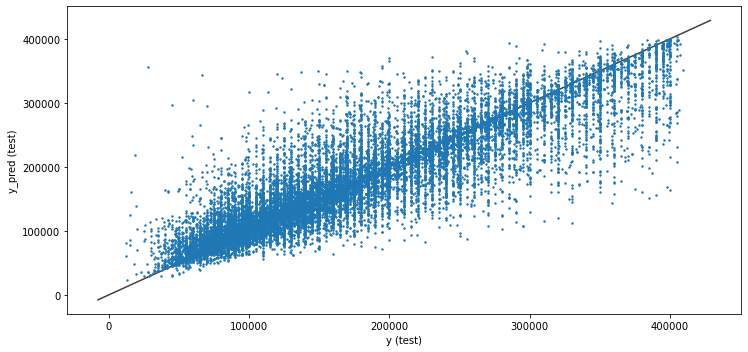

In [119]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_2, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

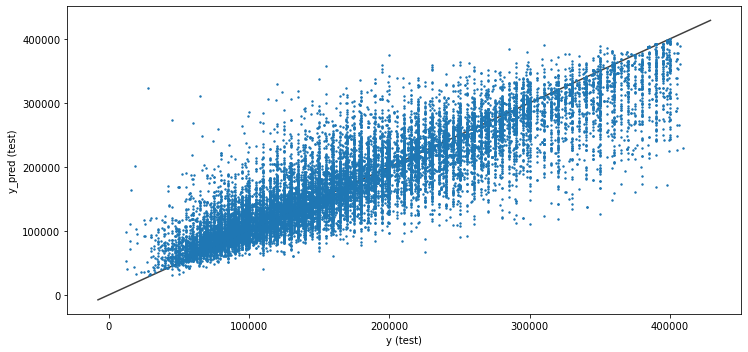

In [120]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_3, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

**Podemos ver que el modelo los dos modelos mas exactos (vecinos mas cercanos y random forest) fallan en lo mismo. Los precios mayores son mas dificiles de predecir para los modelos. Como podemos ver en los histogramas que las columnas de la derecha del centro son un poco mas altas que las de la izquierda, y en el scatter que vemos que las predicciones de precios mas altos estan mas alejadas de la recta. Yo creo que esto se debe a que tenemos pocos datos con precios altos por eso el modelo falla ahi.**

## **Criticas a la metodologia utilizada**

**Al trabajar con un dataset muy grande el costo cumputacional fue un gran limitante.
Se podrian haber incluidos funciones para la implementacion de los modelos para ahorrar codigo. Tambien se deberian probrar los modelos avanzados con un rango mayor en los parametros para mejorarlos.
Con respecto al manejo de nulos se podria haber usado un Knn Imputer para mejorar la precision de la imputacion de nulos con un KNN imputer.
Se puede agregar todo el analisis de las features que se realizo en el Proyecto 1 para que este mas completo.**

## **CLUSTERING**

In [121]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93497 entries, 0 to 93496
Columns: 108 entries, rooms to PH
dtypes: float64(5), uint8(103)
memory usage: 12.8 MB


In [123]:
X3= scaler.fit_transform(X)
pca = PCA(n_components=2)
X2=pca.fit_transform(X3)
X3=pd.DataFrame(X2,columns=['A','B'])
X3['property_type']=properati_copia['property_type']

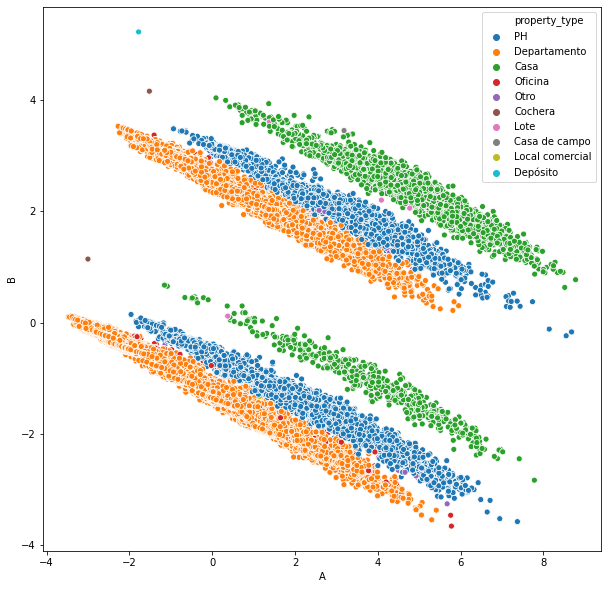

In [124]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = X3['A'], y = X3['B'],hue=X3['property_type'])
plt.show()

In [125]:
X3= scaler.fit_transform(X)
pca = PCA(n_components=2)
X2=pca.fit_transform(X3)
X3=pd.DataFrame(X2,columns=['A','B'])
X3['l2']=properati_copia['l2']

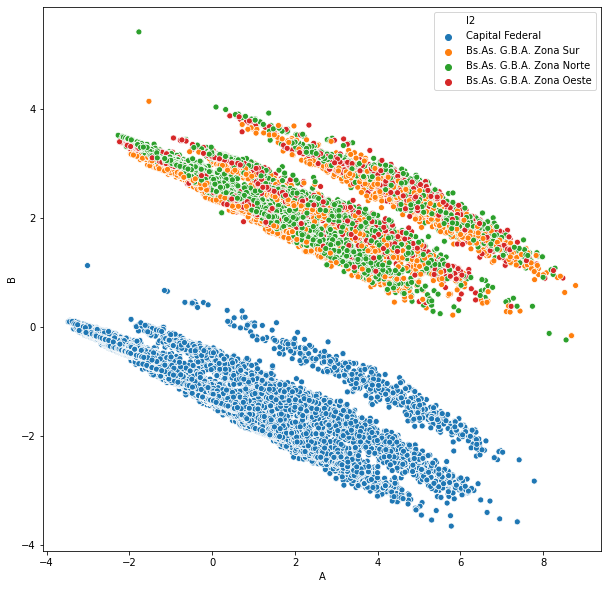

In [126]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = X3['A'], y = X3['B'],hue=X3['l2'])
plt.show()

In [127]:
X_clus=X3[['A','B']]

In [128]:
db=DBSCAN(eps=0.5, min_samples=10)

In [129]:
kmeans_1 = KMeans(n_clusters=4, random_state=0)

In [130]:
kmeans_1.fit(X_clus)

KMeans(n_clusters=4, random_state=0)

In [131]:
etiquetas_1 = kmeans_1.labels_
centros_1 = kmeans_1.cluster_centers_

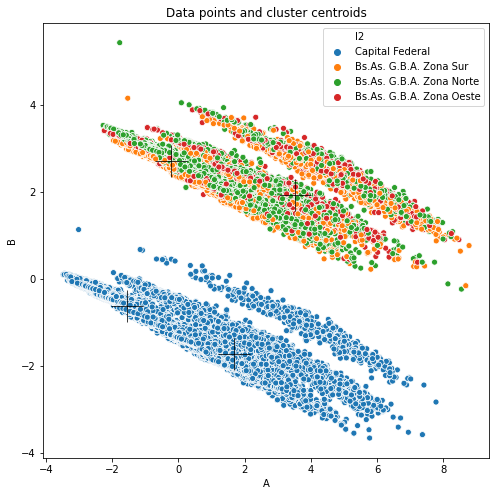

In [132]:
plt.figure(figsize = (8,8))
sns.scatterplot(X_clus['A'], X_clus['B'], hue = X3['l2'])
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

**Aplicamos una reduccion de dimensionalidad y un escalado de datos para poder llegar a tener mejor visualizacion. En cuanto al tipo de propiedad no tenemos una separacion tan clara, si bien hay dos clusters marcados, los tipo de propiedad estan mezclados en todos ellos. Luego hicimos una clusterizacion con respecto a la zonas y tenemos dos clusters bien diferenciados. Por un lado tenemos Capital Federal y por el otro la Provincia de Buenos Aires, es la separacion que mejor se puede visualizar.**